# Covtype Dataset - Description

## Features Overview

### **Topographic Features (Continuous):**
- **Elevation**: Height above sea level (in meters).  
- **Aspect**: Compass direction that a slope faces (in degrees).  
- **Slope**: Steepness of the terrain (in degrees).  
- **Hillshade_9am / Hillshade_Noon / Hillshade_3pm**: Amount of sunlight at different times of day.  
- **Horizontal_Distance_To_Hydrology / Vertical_Distance_To_Hydrology**: Distance to water sources.  
- **Horizontal_Distance_To_Roadways** and **Horizontal_Distance_To_Fire_Points**: Proximity to roads and fire points.  

### **Wilderness Area (Binary):**
- **Wilderness_Area1 – Wilderness_Area4**: Indicating presence in one of 4 designated wilderness areas.  

### **Soil Types (Binary):**
- **Soil_Type1 – Soil_Type40**: Each representing a unique soil classification.  

### **Target Column:**
- **Cover_Type**: Categorical label (**1–7**) representing forest cover types such as **Spruce/Fir, Lodgepole Pine, etc.**  


In [ ]:
# Import libraries

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression


from xgboost import XGBClassifier

# SHAP
import shap


In [2]:
df = pd.read_csv("covtype.csv")

# Data Understanding 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:

df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
print(df.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

# Data Preprocessing

In [6]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11  

In [7]:
df.duplicated().sum()

np.int64(0)

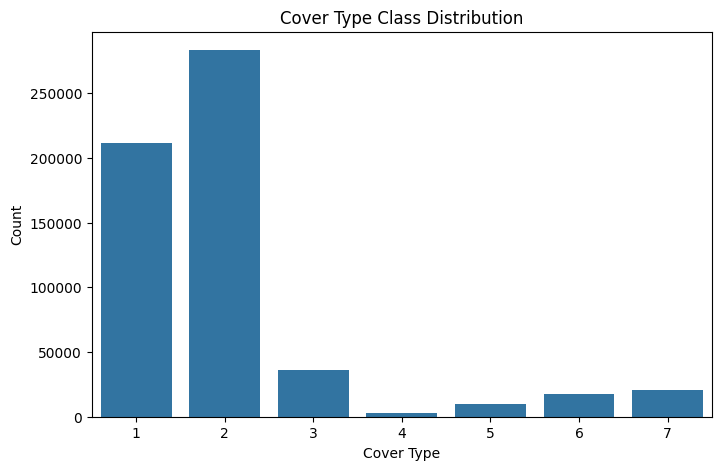

In [8]:
# 1. Check target class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Cover_Type', data=df)
plt.title("Cover Type Class Distribution")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()

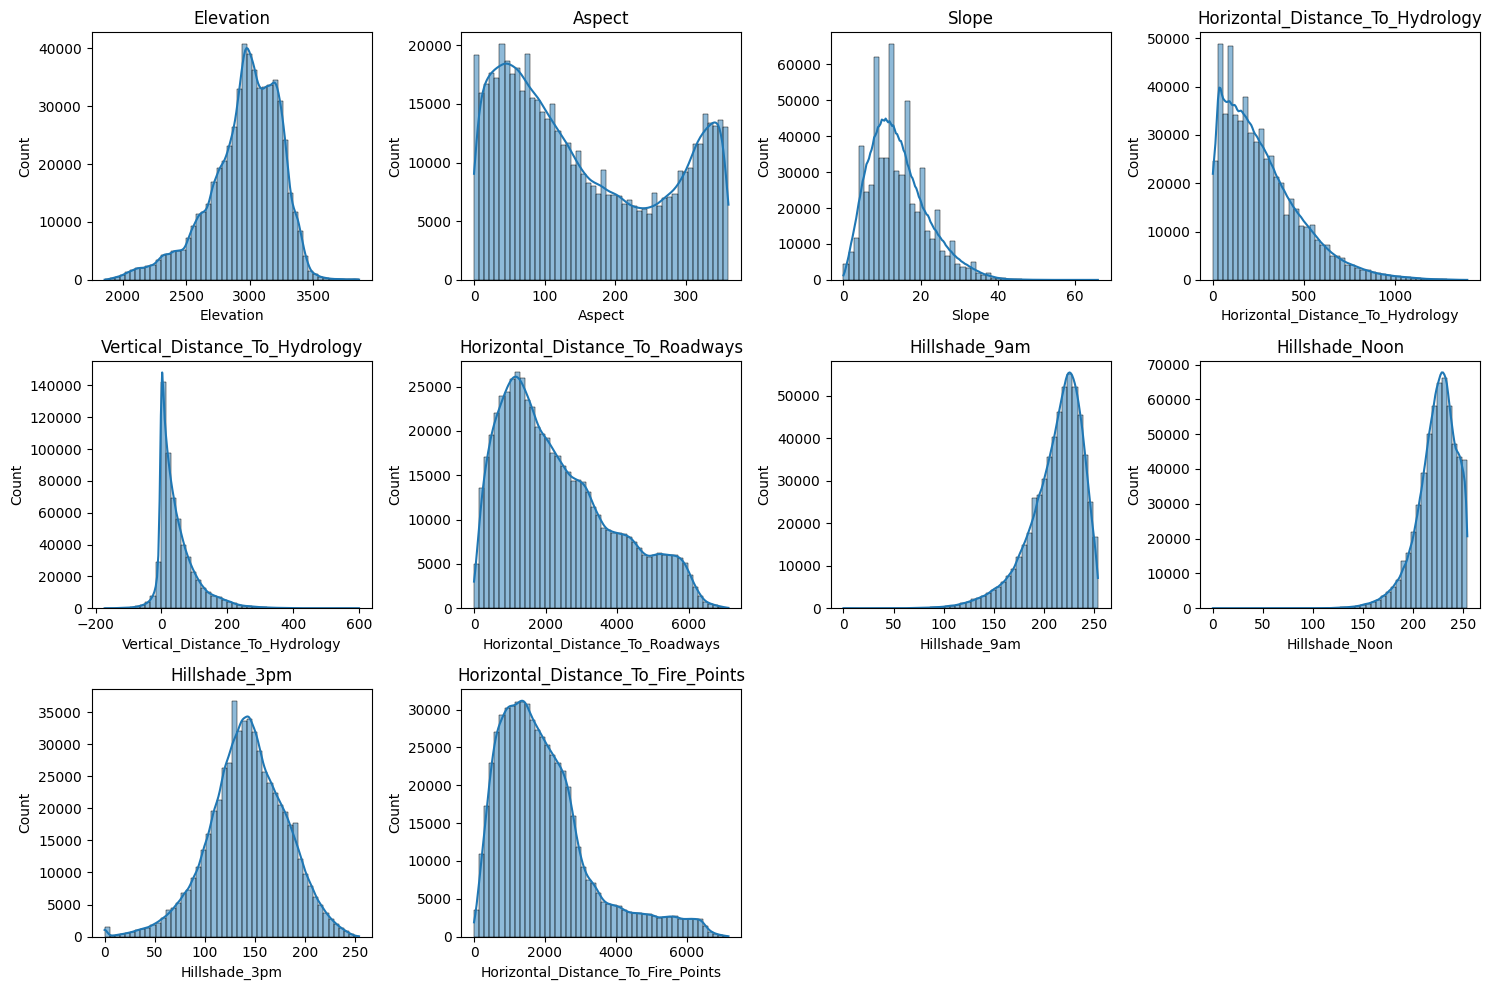

In [12]:
# 2. Histograms for continuous features (assume first 10 columns are continuous)
continuous_features = df.columns[:10]  # adjust if needed
plt.figure(figsize=(15,10))
for i, col in enumerate(continuous_features):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

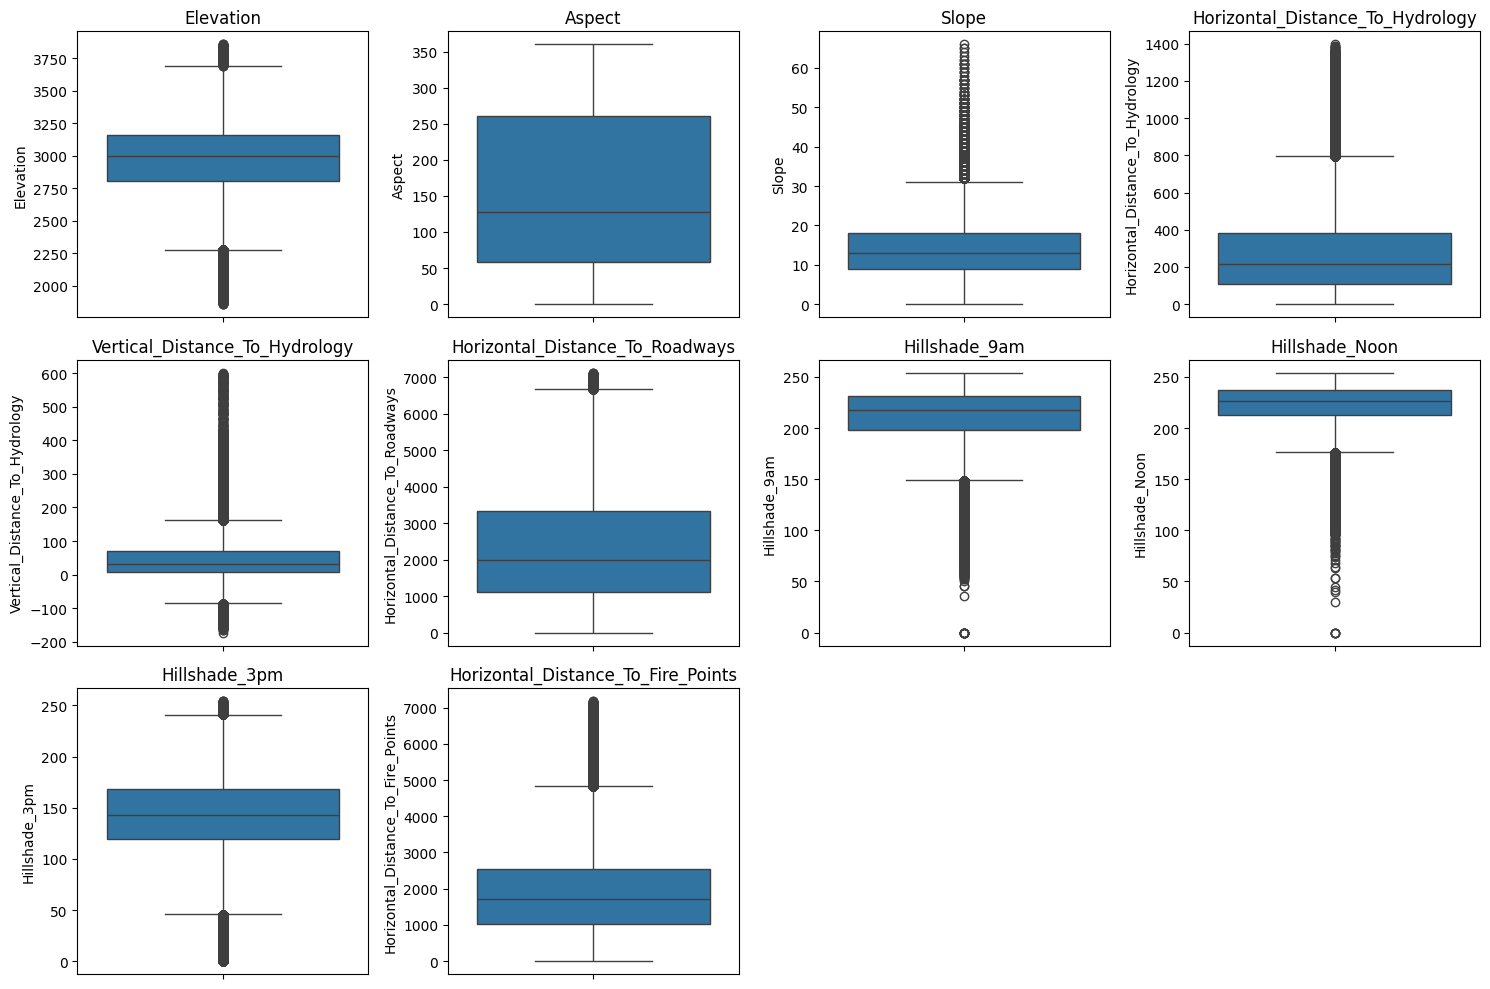

In [13]:
# 3. Boxplots to check for outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(continuous_features):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

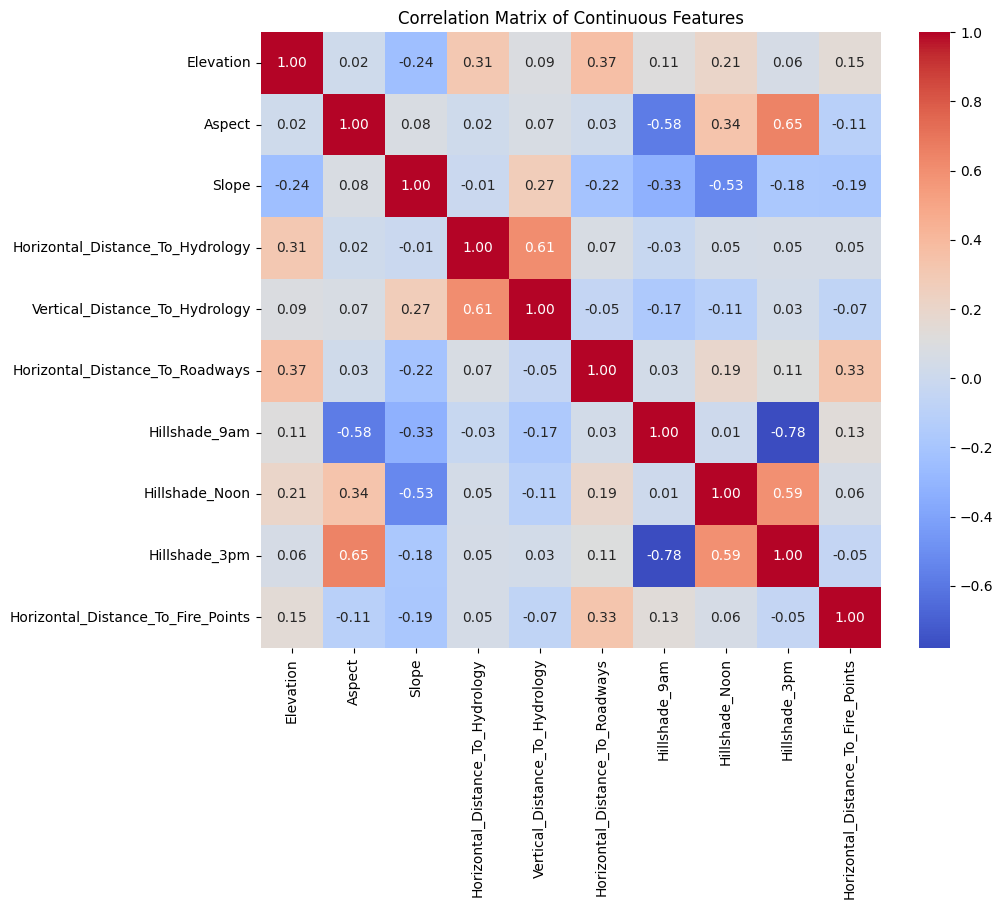

In [15]:
# 4. Correlation heatmap for continuous features
plt.figure(figsize=(10,8))
corr = df[continuous_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Continuous Features")
plt.show()

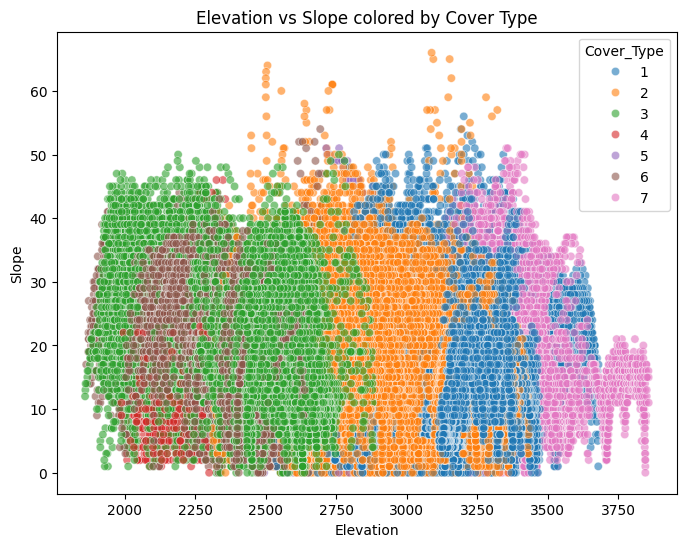

In [14]:
# 6. Visualize relationship between Elevation and Slope colored by Cover_Type
plt.figure(figsize=(8,6))
sns.scatterplot(x='Elevation', y='Slope', hue='Cover_Type', data=df, palette='tab10', alpha=0.6)
plt.title("Elevation vs Slope colored by Cover Type")
plt.show()

In [9]:
# Get the class distribution
class_dist = df['Cover_Type'].value_counts()

# Loop through each class and print its percentage
for i, number in enumerate(class_dist):
    percent = (number / class_dist.sum()) * 100  # Calculate percentage
    print('Cover_Type', class_dist.index[i], '=>', round(percent, 2), '%')


Cover_Type 2 => 48.76 %
Cover_Type 1 => 36.46 %
Cover_Type 3 => 6.15 %
Cover_Type 7 => 3.53 %
Cover_Type 6 => 2.99 %
Cover_Type 5 => 1.63 %
Cover_Type 4 => 0.47 %


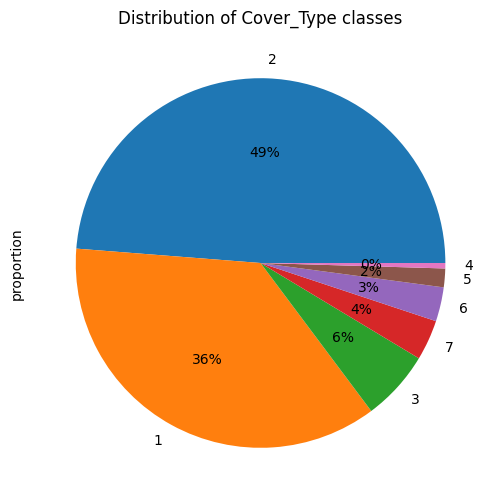

In [10]:
plt.figure(figsize=(6,6))
df['Cover_Type'].value_counts(normalize=True).plot.pie(autopct='%1.f%%')
plt.title('Distribution of Cover_Type classes')
plt.show()

In [23]:
# PLot Correlation Matrix
# Compute correlation matrix
corr = df.corr()

# Option 1: Using Styler.format
corr.style.background_gradient(cmap='PuBu').format("{:.2f}")

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.00,0.02,-0.24,0.31,0.09,0.37,0.11,0.21,0.06,0.15,0.13,0.24,0.07,-0.62,-0.20,-0.19,-0.18,-0.18,-0.15,-0.21,-0.00,-0.00,-0.06,-0.43,-0.13,-0.12,-0.04,-0.08,-0.01,-0.06,-0.11,-0.08,0.03,-0.04,0.02,0.16,0.12,0.05,0.03,-0.02,0.04,-0.03,0.07,-0.03,0.07,0.17,0.07,0.01,0.08,0.02,0.04,0.22,0.19,0.21,-0.27
Aspect,0.02,1.00,0.08,0.02,0.07,0.03,-0.58,0.34,0.65,-0.11,-0.14,0.06,0.07,0.08,-0.01,-0.01,-0.00,0.02,0.01,0.01,-0.01,-0.00,-0.02,0.05,-0.06,-0.07,0.05,0.01,-0.00,0.01,-0.00,-0.03,-0.00,-0.03,0.03,0.02,0.01,0.02,-0.00,-0.01,0.01,0.03,-0.06,-0.03,0.00,0.06,0.02,0.01,-0.02,0.00,-0.02,0.02,0.01,-0.01,0.02
Slope,-0.24,0.08,1.00,-0.01,0.27,-0.22,-0.33,-0.53,-0.18,-0.19,-0.23,-0.04,0.13,0.26,0.11,-0.02,0.13,0.13,0.07,0.00,-0.02,-0.02,-0.03,0.24,-0.05,-0.17,0.19,0.00,0.00,-0.03,-0.04,-0.05,-0.08,-0.08,-0.03,-0.05,-0.21,0.08,0.03,-0.02,0.04,0.07,-0.08,0.08,-0.03,-0.13,0.21,-0.01,-0.02,0.00,0.01,-0.07,0.09,0.03,0.15
Horizontal_Distance_To_Hydrology,0.31,0.02,-0.01,1.00,0.61,0.07,-0.03,0.05,0.05,0.05,-0.10,0.06,0.12,-0.10,-0.04,-0.01,-0.04,-0.05,-0.01,-0.01,0.00,-0.00,-0.02,-0.07,0.00,0.01,-0.00,-0.04,-0.00,-0.07,-0.07,-0.01,-0.04,-0.08,-0.04,-0.05,-0.13,0.02,0.02,0.01,0.05,0.03,-0.00,-0.05,0.07,0.13,0.10,0.07,-0.01,0.03,-0.01,0.04,0.03,0.15,-0.02
Vertical_Distance_To_Hydrology,0.09,0.07,0.27,0.61,1.00,-0.05,-0.17,-0.11,0.03,-0.07,-0.18,-0.01,0.15,0.08,0.02,0.01,0.01,0.03,0.03,0.05,-0.01,-0.01,-0.03,0.06,-0.02,-0.04,0.08,-0.02,-0.00,-0.05,-0.05,-0.03,-0.06,-0.08,-0.03,-0.08,-0.18,0.04,-0.01,-0.01,0.07,0.07,-0.08,-0.01,0.03,0.04,0.17,0.06,-0.01,0.01,-0.01,-0.01,0.04,0.18,0.08
Horizontal_Distance_To_Roadways,0.37,0.03,-0.22,0.07,-0.05,1.00,0.03,0.19,0.11,0.33,0.45,-0.20,-0.23,-0.27,-0.08,-0.09,-0.08,-0.09,-0.06,-0.11,0.02,0.03,-0.05,-0.18,-0.10,0.05,-0.05,-0.03,-0.00,0.02,-0.05,-0.05,0.07,0.06,-0.01,0.05,-0.01,-0.03,-0.03,0.00,0.00,-0.03,0.31,0.08,-0.06,-0.09,-0.08,0.01,-0.00,0.01,0.02,0.08,0.03,0.02,-0.15
Hillshade_9am,0.11,-0.58,-0.33,-0.03,-0.17,0.03,1.00,0.01,-0.78,0.13,0.20,-0.01,-0.10,-0.20,-0.00,0.04,0.04,0.02,-0.05,-0.01,0.00,0.01,0.02,-0.22,0.05,0.09,-0.07,-0.01,-0.00,-0.01,0.00,0.03,0.02,0.02,-0.01,0.00,0.04,-0.11,0.03,0.03,0.00,-0.09,0.08,0.10,-0.04,0.01,-0.06,0.01,0.03,0.01,0.01,0.02,-0.03,-0.00,-0.04
Hillshade_Noon,0.21,0.34,-0.53,0.05,-0.11,0.19,0.01,1.00,0.59,0.06,0.03,0.04,0.05,-0.20,-0.05,0.04,0.00,0.08,-0.06,-0.01,0.01,0.01,0.01,-0.25,-0.01,0.06,0.06,0.00,-0.00,0.02,0.03,0.02,0.04,0.02,0.03,0.03,0.12,-0.13,0.01,0.04,0.02,-0.00,-0.02,-0.03,-0.00,0.13,-0.09,0.04,0.01,0.02,-0.02,0.04,-0.07,-0.04,-0.10
Hillshade_3pm,0.06,0.65,-0.18,0.05,0.03,0.11,-0.78,0.59,1.00,-0.05,-0.12,0.03,0.09,0.02,-0.05,-0.01,-0.06,-0.00,-0.01,-0.00,0.00,0.00,-0.01,0.02,-0.04,-0.02,0.05,0.01,-0.00,0.02,0.02,-0.01,0.02,0.00,0.03,0.03,0.06,0.02,-0.03,0.00,0.00,0.06,-0.06,-0.12,0.04,0.08,-0.02,0.02,-0.02,0.00,-0.02,0.02,-0.03,-0.02,-0.05
Horizontal_Distance_To_Fire_Points,0.15,-0.11,-0.19,0.05,-0.07,0.33,0.13,0.06,-0.05,1.00,0.38,0.03,-0.28,-0.24,-0.07,-0.08,-0.08,-0.08,-0.05,-0.09,0.03,0.03,-0.04,-0.18,-0.04,0.26,-0.09,-0.03,-0.00,0.07,-0.02,0.11,0.01,0.11,-0.02,-0.02,-0.03,0.01,0.04,0.02,-0.00,-0.02,0.22,0.05,-0.07,-0.09,-0.06,-0.04,-0.00,-0.01,0.00,-0.02,-0.00,0.01,-0.11


In [11]:
for col in df.columns:
    if df[col].std()==0:
        df.drop(columns=col,axis=1,inplace=True)

In [12]:
df.corr()["Cover_Type"]

Elevation                            -0.269554
Aspect                                0.017080
Slope                                 0.148285
Horizontal_Distance_To_Hydrology     -0.020317
Vertical_Distance_To_Hydrology        0.081664
Horizontal_Distance_To_Roadways      -0.153450
Hillshade_9am                        -0.035415
Hillshade_Noon                       -0.096426
Hillshade_3pm                        -0.048290
Horizontal_Distance_To_Fire_Points   -0.108936
Wilderness_Area1                     -0.203913
Wilderness_Area2                     -0.048059
Wilderness_Area3                      0.066846
Wilderness_Area4                      0.323200
Soil_Type1                            0.090828
Soil_Type2                            0.118135
Soil_Type3                            0.068064
Soil_Type4                            0.099672
Soil_Type5                            0.077890
Soil_Type6                            0.112958
Soil_Type7                           -0.000496
Soil_Type8   

# Separate features (X) and target (y)

In [13]:
x = df.drop(columns=['Cover_Type'],axis=1)
y = df["Cover_Type"]

In [14]:
x.head(1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y.head(1)

0    5
Name: Cover_Type, dtype: int64

In [16]:
# Raqamli ustunlarni scaler qilish
num_cols = ["Elevation","Aspect","Slope",
            "Horizontal_Distance_To_Hydrology",
            "Vertical_Distance_To_Hydrology",
            "Horizontal_Distance_To_Roadways",
            "Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
            "Horizontal_Distance_To_Fire_Points"]

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the numerical columns
# This transforms each numerical feature to have mean = 0 and standard deviation = 1
x[num_cols] = scaler.fit_transform(x[num_cols])

In [ ]:
# Split the dataset into training and testing sets
# 80% of the data will be used for training, 20% for testing
# random_state=42 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)

# LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict the target values for the test set using the trained Linear Regression model
# Round the predicted values to the nearest integer and convert them to integers
y_pred = np.round(lr.predict(x_test)).astype(int)

In [22]:
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Linear Regression Accuracy: 0.5491252377305234
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.68      0.34      0.45     42557
           2       0.64      0.81      0.72     56500
           3       0.24      0.43      0.31      7121
           4       0.04      0.79      0.08       526
           5       0.00      0.00      0.00      1995
           6       1.00      0.00      0.00      3489
           7       1.00      0.01      0.02      4015
           8       0.00      0.00      0.00         0

    accuracy                           0.55    116203
   macro avg       0.40      0.26      0.17    116203
weighted avg       0.64      0.55      0.53    116203



c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [23]:
import joblib

In [ ]:
# Save the trained Linear Regression model to a file using joblib
joblib.dump(lr, "linear_regression.pkl")

['linear_regression.pkl']

# LogisticRegression

In [ ]:
log_reg = LogisticRegression(max_iter=1000, multi_class="multinomial")
log_reg.fit(x_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [26]:
y_pred = log_reg.predict(x_test)

In [27]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7247145082312849
              precision    recall  f1-score   support

           1       0.71      0.70      0.71     42557
           2       0.75      0.80      0.77     56500
           3       0.68      0.80      0.74      7121
           4       0.57      0.40      0.47       526
           5       0.22      0.01      0.01      1995
           6       0.49      0.27      0.35      3489
           7       0.72      0.58      0.64      4015

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203



In [28]:
joblib.dump(log_reg, "logistic_regression.pkl")

['logistic_regression.pkl']

# DecisionTree

In [29]:
dt = DecisionTreeClassifier(random_state=42, max_depth=20)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [30]:
y_pred = dt.predict(x_test)

In [31]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.9058974381040077
              precision    recall  f1-score   support

           1       0.92      0.89      0.90     42557
           2       0.90      0.94      0.92     56500
           3       0.91      0.88      0.90      7121
           4       0.85      0.79      0.82       526
           5       0.82      0.61      0.70      1995
           6       0.79      0.80      0.80      3489
           7       0.94      0.93      0.94      4015

    accuracy                           0.91    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.91      0.91      0.91    116203



In [32]:
joblib.dump(dt, "decision_tree.pkl")

['decision_tree.pkl']

# RandomForest

In [33]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [34]:
y_pred = rf.predict(x_test)

In [35]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9559391754085522
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.95      0.97      0.96      7121
           4       0.92      0.84      0.88       526
           5       0.94      0.78      0.85      1995
           6       0.94      0.90      0.92      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



In [ ]:
# Save
joblib.dump(rf, "forest_cover_rf.pkl")

['forest_cover_rf.pkl']

# XGBClassifier

In [37]:
y_train = np.array(y_train) - 1
y_test = np.array(y_test) - 1

In [38]:
xgb = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
y_pred = xgb.predict(x_test)
y_pred = y_pred + 1

In [40]:
y_pred = xgb.predict(x_test)

In [41]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.9293133567980173
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     42557
           1       0.92      0.95      0.94     56500
           2       0.95      0.95      0.95      7121
           3       0.93      0.85      0.89       526
           4       0.91      0.75      0.82      1995
           5       0.91      0.91      0.91      3489
           6       0.97      0.96      0.97      4015

    accuracy                           0.93    116203
   macro avg       0.93      0.90      0.91    116203
weighted avg       0.93      0.93      0.93    116203



In [42]:
joblib.dump(xgb, "xgboost.pkl")

['xgboost.pkl']

| **Model**           | **Accuracy** | **Macro Avg Precision** | **Macro Avg Recall** | **Macro Avg F1-score** |
| ------------------- | ------------ | ----------------------- | -------------------- | ---------------------- |
| Linear Regression   | 0.5491       | 0.40                    | 0.26                 | 0.17                   |
| Logistic Regression | 0.7247       | 0.59                    | 0.51                 | 0.53                   |
| Decision Tree       | 0.9059       | 0.88                    | 0.83                 | 0.85                   |
| Random Forest       | 0.9559       | 0.95                    | 0.91                 | 0.93                   |
| XGBoost             | 0.9293       | 0.93                    | 0.90                 | 0.91                   |


# 5. FEATURE ENGINEERING

In [43]:
# Road va Fire distance kombinatsiyasi
df["Road_Fire_Dist"] = df["Horizontal_Distance_To_Roadways"] + df["Horizontal_Distance_To_Fire_Points"]


In [ ]:
# new feature 'Hydro_Dist' as the difference between horizontal and vertical distances to hydrology
df["Hydro_Dist"] = df["Horizontal_Distance_To_Hydrology"] - df["Vertical_Distance_To_Hydrology"]

In [ ]:
# Create a new feature 'Slope_Aspect' by multiplying slope and aspect
df["Slope_Aspect"] = df["Slope"] * df["Aspect"]

In [ ]:
# Save
df.to_csv("covtype_feature_engineered.csv", index=False)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 58 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

# Hyperparameter Tuning with RandomizedSearchCV

In [59]:
X_small, _, y_small, _ = train_test_split(x_train, y_train,train_size=45000,stratify=y_train,random_state=42)
dt_small = DecisionTreeClassifier(random_state=42)

In [60]:
param_grid_dt = {
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
}

 # Hyperparameter Tuning (Decision Tree)

In [61]:
dt_random = RandomizedSearchCV(estimator=dt_small, param_distributions=param_grid_dt, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
dt_random.fit(X_small, y_small)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15]},
                   random_state=42, verbose=2)

In [62]:
best_dt = dt_random.best_estimator_
y_pred_best_dt = best_dt.predict(x_test)

In [64]:
print("Best Params:", dt_random.best_params_)
print("Best CV Score:", dt_random.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_dt))

Best Params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}
Best CV Score: 0.8024666666666667
Test Accuracy: 0.8178704508489454


In [67]:
best_dt = dt_random.best_estimator_
joblib.dump(best_dt, "decision_tree_random.pkl")

['decision_tree_random.pkl']

 # Hyperparameter Tuning (Random Forest)


In [74]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [75]:
# Initialize RandomForest
rf_small = RandomForestClassifier(random_state=42)

In [76]:
rf_random = RandomizedSearchCV(
    estimator=rf_small,
    param_distributions=param_grid_rf,
    n_iter=50,       # smaller than 100 for faster run
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [77]:
# Fit on training subset
rf_random.fit(X_small, y_small)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, verbose=2)

In [78]:
# Best model
best_rf = rf_random.best_estimator_

In [80]:
# Predictions
y_pred_best_rf = best_rf.predict(x_test)

In [81]:
# Results
print("Best Params:", rf_random.best_params_)
print("Best CV Score:", rf_random.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40, 'bootstrap': True}
Best CV Score: 0.8745111111111111
Test Accuracy: 0.8959235131623108


In [84]:
best_rf = rf_random.best_estimator_
joblib.dump(best_rf, "random_forest_random.pkl")

['random_forest_random.pkl']

# Hyperparameter Tuning (XGBoost)

In [85]:
from xgboost import XGBClassifier

# Base model
xgb_small = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')


In [86]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_small,
    param_distributions=param_grid_xgb,
    n_iter=50,   # reduce for faster search
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [87]:
# Fit
xgb_random.fit(X_small, y_small)

# Best model
best_xgb = xgb_random.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:54:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [88]:
# Predictions
y_pred_best_xgb = best_xgb.predict(x_test)

In [89]:
# Results
print("Best Params:", xgb_random.best_params_)
print("Best CV Score:", xgb_random.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_xgb))

Best Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best CV Score: 0.8848444444444444
Test Accuracy: 0.9044344810374947


In [90]:
# Save final tuned model
joblib.dump(best_xgb, "best_xgb_model.pkl")

['best_xgb_model.pkl']

# Hyperparameter Tuning with LogisticRegression

In [93]:
# Define parameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],   # saga supports l1 + elasticnet
    'max_iter': [100, 200, 500]
}

In [94]:
# Initialize Logistic Regression
lr_small = LogisticRegression(random_state=42, multi_class='multinomial')

In [96]:
# RandomizedSearchCV
lr_random = RandomizedSearchCV(
    estimator=lr_small,
    param_distributions=param_grid_lr,
    n_iter=20,     # keep smaller for speed
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [97]:
# Fit on training subset
lr_random.fit(X_small, y_small)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
27 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\user\AppData\Loc

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(multi_class='multinomial',
                                                random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'saga']},
                   random_state=42, verbose=2)

In [98]:
# Best model
best_lr = lr_random.best_estimator_

In [99]:
# Predictions
y_pred_best_lr = best_lr.predict(x_test)

In [100]:
# Results
print("Best Params:", lr_random.best_params_)
print("Best CV Score:", lr_random.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_lr))

Best Params: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100, 'C': 10}
Best CV Score: 0.7199333333333332
Test Accuracy: 0.7234580862800444


In [101]:
# Save final tuned Logistic Regression model
joblib.dump(best_lr, "best_logistic_regression.pkl")

['best_logistic_regression.pkl']

| **Model**           | **Best CV Score** | **Test Accuracy** |
| ------------------- | ----------------- | ----------------- |
| Logistic Regression | 0.7199            | 0.7235            |
| Decision Tree       | 0.8025            | 0.8179            |
| Random Forest       | 0.8745            | 0.8959            |
| XGBoost             | 0.8848            | 0.9044            |


| **Model**           | **Before Tuning Accuracy** | **Before Tuning F1-score (Macro Avg)** | **After Tuning Best CV Score** | **After Tuning Test Accuracy** |
| ------------------- | -------------------------- | -------------------------------------- | ------------------------------ | ------------------------------ |
| Linear Regression   | 0.5491                     | 0.17                                   | N/A                            | N/A                            |
| Logistic Regression | 0.7247                     | 0.53                                   | 0.7199                         | 0.7235                         |
| Decision Tree       | 0.9059                     | 0.85                                   | 0.8025                         | 0.8179                         |
| Random Forest       | 0.9559                     | 0.93                                   | 0.8745                         | 0.8959                         |
| XGBoost             | 0.9293                     | 0.91                                   | 0.8848                         | 0.9044                         |


In [111]:
# Calculate improvement or decline
comparison["Change in Accuracy"] = comparison["After Test Accuracy"] - comparison["Before Accuracy"]

# Show results
print(comparison[["Model","Before Accuracy","After Test Accuracy","Change in Accuracy"]])




                 Model  Before Accuracy  After Test Accuracy  \
0    Linear Regression           0.5491                  NaN   
1  Logistic Regression           0.7247               0.7235   
2        Decision Tree           0.9059               0.8179   
3        Random Forest           0.9559               0.8959   
4              XGBoost           0.9293               0.9044   

   Change in Accuracy  
0                 NaN  
1             -0.0012  
2             -0.0880  
3             -0.0600  
4             -0.0249  
